In [1]:
import qiskit_braket_provider

## Criando o circuito quântico

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1,1)
qc.h(0)

qc.draw()

┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════

## Executando no simulador local

In [3]:
from qiskit_braket_provider import BraketLocalBackend

local_simulator = BraketLocalBackend()

task = local_simulator.run(qc, shots = 2**13)

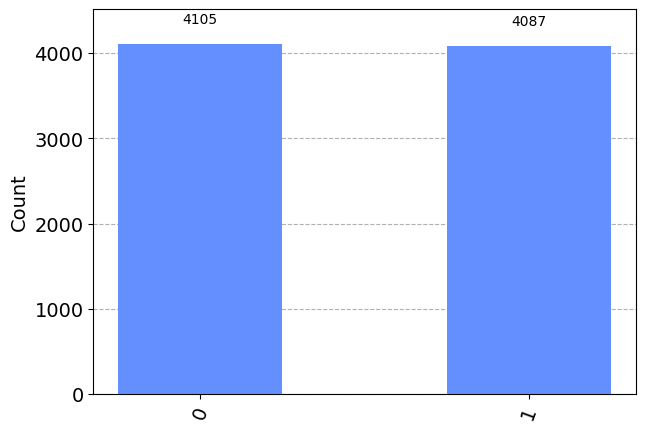

In [4]:
from qiskit.visualization import plot_histogram

plot_histogram(task.result().get_counts())

In [19]:
# Tem que instalar o Qiskit Experiments
# pip install qiskit-experiments
from qiskit_experiments.library.tomography import StateTomography

In [20]:
# circuitos para tomografia de estados e configuração
qstc = StateTomography(qc, [0])

In [21]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')

In [22]:
qstd = qstc.run(simulator)

In [24]:
print(qstd.analysis_results("state").value)

DensityMatrix([[0.51950296+0.00000000e+00j, 0.49927583-1.85278140e-02j],
               [0.49927583+1.85278140e-02j, 0.48049704+3.46944695e-18j]],
              dims=(2,))


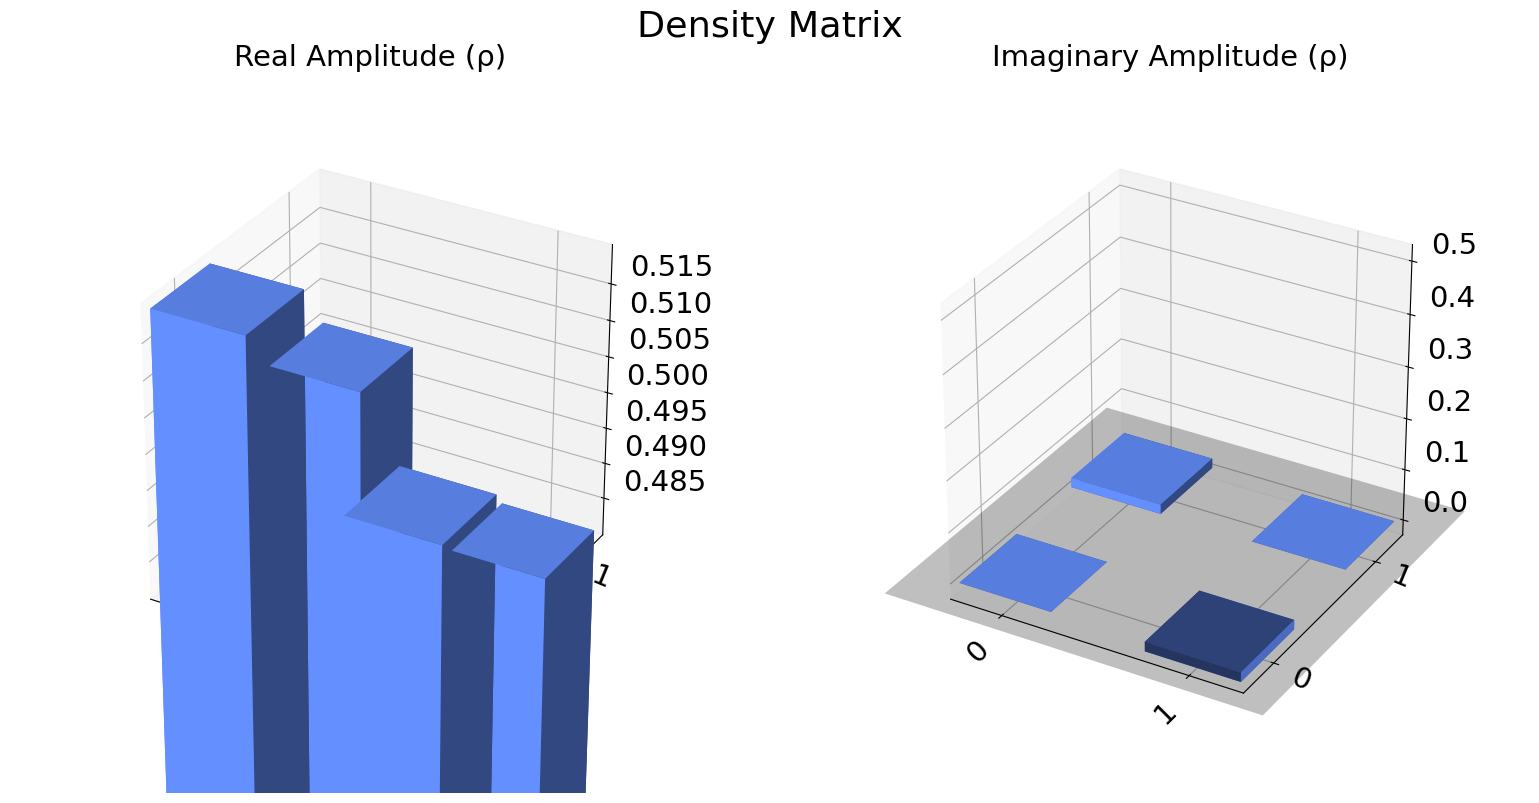

In [23]:
from qiskit.visualization import plot_state_city
plot_state_city(qstd.analysis_results("state").value, title='Density Matrix')

In [18]:
qstd = qstc.run(local_simulator)

ValueError: Observable's qubit count 1 and the size of the target qubit set QubitSet([Qubit(0), Qubit(1)]) must be equal